In [1]:
import pandas as pd
from kerasbeats import prep_time_series, NBeatsModel

2024-01-22 20:54:49.828957: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 20:54:49.829014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 20:54:49.830108: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 20:54:49.837286: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 20:54:52.153452: W tensorflow/compiler/tf2

In [6]:
from preprocessing import Preproc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
series = ['airline']
for serie in series:
    path_serie = f'/home/eraylson/union/timeseries/{serie}.txt'
    df_serie = pd.read_csv(path_serie, header=None)
    pre = Preproc()
    serie_np = df_serie.to_numpy().reshape(-1, )
    dict_samples = pre.split_serie(serie_np, perc_train = 0.75)
    train, test = dict_samples['train'], dict_samples['test']
    _ = pre.normalise_interval(train)
    train_norm = pre.normalise_interval(train)
    test_norm = pre.normalise_interval(test)
    idx_lags = pre.select_lag_acf( train_norm, 20)
    X_train, y_train = pre.create_windows(train_norm, np.max(idx_lags)+1)

    qtd_lags = np.max(idx_lags)
    test_with_previous = np.vstack([train_norm[-qtd_lags-1:], test_norm])
    X_test, y_test = pre.create_windows(test_with_previous, np.max(idx_lags)+1)
    
    X_train = X_train[:, idx_lags]
    X_test = X_test[:, idx_lags]

    nbeats = NBeatsModel(model_type = 'generic', lookback = X_train.shape[1], horizon = 1)
    nbeats.fit(X_train, y_train, epochs = 100)

LAGS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Epoch 1/100
1/1 [==============================] - 63s 63s/step - loss: 0.1283 - mae: 0.1283 - mape: 43.1807
Epoch 2/100
1/1 [==============================] - 0s 297ms/step - loss: 12.1581 - mae: 12.1581 - mape: 5261.0220
Epoch 3/100
1/1 [==============================] - 0s 266ms/step - loss: 2.6441 - mae: 2.6441 - mape: 1163.5188
Epoch 4/100
1/1 [==============================] - 0s 279ms/step - loss: 1.2024 - mae: 1.2024 - mape: 543.3370
Epoch 5/100
1/1 [==============================] - 0s 297ms/step - loss: 0.9259 - mae: 0.9259 - mape: 384.8897
Epoch 6/100
1/1 [==============================] - 0s 338ms/step - loss: 0.1721 - mae: 0.1721 - mape: 65.1487
Epoch 7/100
1/1 [==============================] - 0s 290ms/step - loss: 0.1118 - mae: 0.1118 - mape: 54.0895
Epoch 8/100
1/1 [==============================] - 0s 309ms/step - loss: 0.2612 - mae: 0.2612 - mape: 108.7200
Epoch 9/100
1/1 [==============================] - 0s 333ms/step - l

In [10]:
prev = nbeats.predict(X_train)

3/3 [==============================] - 2s 35ms/step


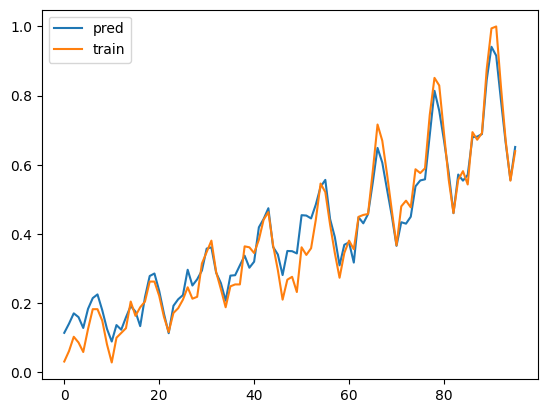

In [11]:
plt.plot(prev, label = 'pred')
plt.plot(y_train, label = 'train')
plt.legend()
plt.show()

2/2 [==============================] - 2s 50ms/step


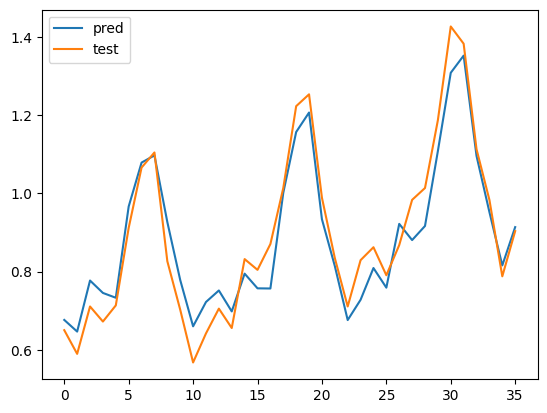

In [12]:
prev_test = nbeats.predict(X_test)
plt.plot(prev_test, label = 'pred')
plt.plot(y_test, label = 'test')
plt.legend()
plt.show()